#Colebrook equation solver

Solving the Colebrook equation to determine the friction coefficient for internal pipes using the New-Raphson method.

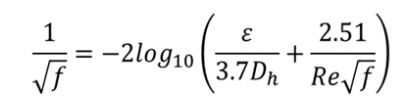

In [2]:
import math

def colebrook_eqn(f, e, D, Re):
  return 1.0 / math.sqrt(f) + 2.0 * math.log10((e/D)/3.7 + 2.51 / (Re * math.sqrt(f)))

def colebrook_deriv(f, e, D, Re):
  return -0.5 / (f * math.sqrt(f)) - 2.0 / (Re * math.sqrt(f) * math.log(10.0)) * (e / D) / (2.51 / (Re * math.sqrt(f)) + (e / D) / 3.7)

# Use o método de Newton-Raphson para resolver a equação de Colebrook e encontrar o valor de f:

def solve_colebrook(e, D, Re):
    f = 0.01  # valor inicial de f
    tol = 1e-8  # tolerância para o erro
    max_iter = 100  # número máximo de iterações permitidas
    iter_count = 0
    while iter_count < max_iter:
        f_next = f - colebrook_eqn(f, e, D, Re) / colebrook_deriv(f, e, D, Re)
        if abs(f_next - f) < tol:
            return f_next
        f = f_next
        iter_count += 1
    raise ValueError("A solução não converge após %d iterações" % max_iter)

In [9]:
! pip install CoolProp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 66.4 MB/s eta 0:00:00


In [13]:
import CoolProp.CoolProp as CP
e = 0.00015  # rugosidade absoluta aço galvanizado
D = 0.136  # diâmetro interno do tubo (em metros)
A = (math.pi*D**2)/4 # area da seção circular
Q = 0.2 # informar a vazão em m^3/s
V = Q/A

fluid = input("Enter the fluid type (e.g. water, air): ")
T_fluid = float(input("Enter the fluid temperature [°C]: "))
p_fluid = float(input("Enter the fluid pressure [bar]: "))
rho = CP.PropsSI("D", "T", T_fluid + 273.15, "P", p_fluid * 1e5, fluid)
mu = CP.PropsSI("viscosity", "T", T_fluid + 273.15, "P", p_fluid * 1e5, fluid)
nu = mu/rho

Re = V*D/nu  # número de Reynolds
f = solve_colebrook(e, D, Re)
print('The specific mass is: '+str(round(rho ,5))+' kg/m^3')
print(f"The absolut viscosity: {mu} Pa.s")
print(f"The kinematic viscosity: {nu} m^2/s")
print("\nReynolds number (Re): {:.2f}".format(Re))
print(f'The friction factor is: {f:.6f}')


Enter the fluid type (e.g. water, air): water
Enter the fluid temperature [°C]: 20
Enter the fluid pressure [bar]: 1
The specific mass is: 998.20654 kg/m^3
The absolut viscosity: 0.0010015965513039936 Pa.s
The kinematic viscosity: 1.0033960985613957e-06 m^2/s

Reynolds number (Re): 1866073.72
The friction factor is: 0.020268


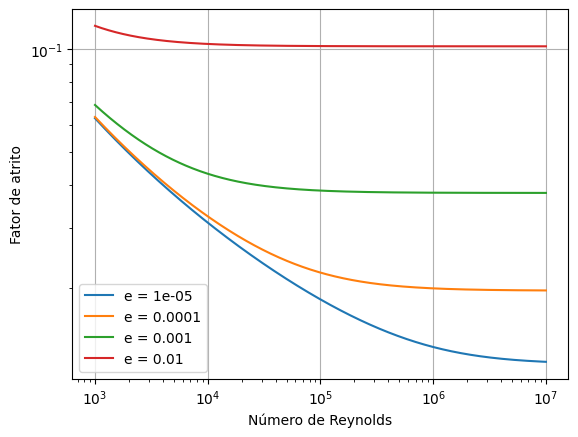

In [14]:
import math
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

# Definindo as constantes necessárias
D = 0.1  # diâmetro interno do tubo (em metros)
N = 1000  # número de pontos a serem plotados

# Criando uma lista de valores para a rugosidade absoluta
e_values = [0.00001, 0.0001, 0.001, 0.01]

# Definindo a função f_colebrook
def f_colebrook(Re, e):
    return solve_colebrook(e, D, Re)

# Criando uma lista de valores para o número de Reynolds
Re_values = np.logspace(3, 7, N)

# Criando o gráfico
plt.figure()

# Plotando o gráfico para cada valor de e
for e in e_values:
    # Calculando os valores de f para cada valor de Re e armazenando-os em uma lista
    f_values = [f_colebrook(Re, e) for Re in Re_values]
    
    # Criando uma função interpolada a partir dos valores discretos de f
    f_interp = interp1d(Re_values, f_values, kind='cubic')
    
    # Criando uma lista de valores de Re para plotagem da curva suave
    Re_smooth = np.logspace(3, 7, 1000)
    
    # Plotando a curva suave
    plt.loglog(Re_smooth, f_interp(Re_smooth), label=f'e = {e}')
    
# Definindo as configurações do gráfico
plt.xlabel('Número de Reynolds')
plt.ylabel('Fator de atrito')
plt.legend()
plt.grid()

# Exibindo o gráfico
plt.show()